# <u> Tic Tac Toe using Pygame </u>

In [19]:
import pygame as pg 
import sys 
import time 
from pygame.locals import *

## Declaring variables for the game:

In [20]:
XO = 'x'
winner = None
draw = None

# size of our canvas for playing the game
width = 400
height = 400

# declaring colour codes 
white = (255, 255, 255) 
line_color = (0, 0, 0) 
   
# setting up a 3 * 3 board in canvas 
board = [[None]*3, [None]*3, [None]*3]

## Creating functions for the game:

### 1] <u> game_initiating_window()</u>

### Pygame functions used are:
### -> <u> screen_name.blit() </u>
### .blit() function is used to display one image over another. As in here, we display our main screen image over the white screen we created. Arguments passed are the image to be displayed and the coordinates from where the image starts.

### -> <u>time.sleep()</u>
### To declare time till which the screen should display our main image.
### -><u> pygame.draw.line()</u>
### To create our game screen, we draw lines according to our need. Arguments passed are starting point, ending point and thickness of the line.

### -> <u> Draw_status()</u>
### At each update of the display we need to know the game status, Weather it is win or lose. draw_status() helps us in displaying another small window ( of size 400x100) at the bottom of the main window, that updates the status at each click of the user.

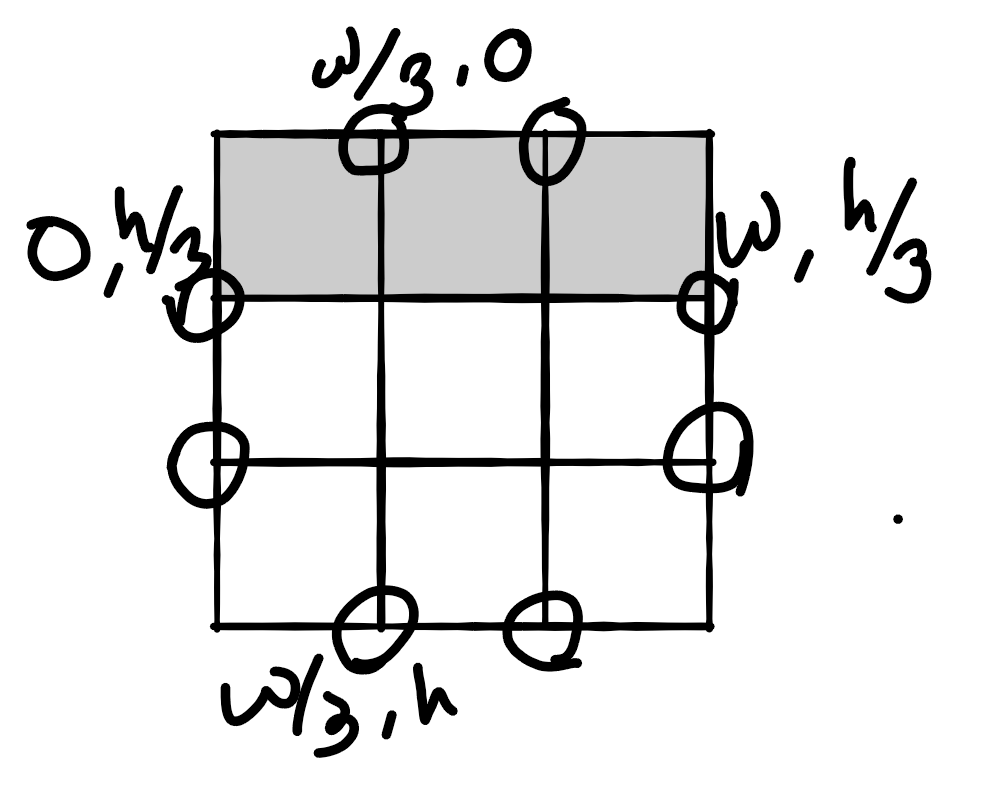

In [21]:
def game_initiating_window(): 
 
    screen.blit(initiating_window, (0, 0)) 
     
    pg.display.update() 
    time.sleep(3)                     
    screen.fill(white) 
    # the first two lines create two vertical lines
    pg.draw.line(screen, line_color, (width / 3, 0), (width / 3, height), 7) 
    pg.draw.line(screen, line_color, (width / 3 * 2, 0), (width / 3 * 2, height), 7)
    
    # these next lines will create two horizontal lines with equal spacing
    pg.draw.line(screen, line_color, (0, height / 3), (width, height / 3), 7) 
    pg.draw.line(screen, line_color, (0, height / 3 * 2), (width, height / 3 * 2), 7)
    
    draw_status() 

### 2] <u> draw_status()</u>
### -> declaring the message to be displayed on the screen, whose turn next and the game status win or draw.

### Pygame functions used are:
### -> <u> pygame.font.Font()</u>
### To create a new font object, arguments passed are font file and font size.

### -> <u> font.render()</u>
### To show text everytime on a new, empty space, replacing the old one, arguments passed are the message to be displayed, color of the text, etc.

### -><u> screen_name.fill()</u>
### To fill the surface provided with the color specified. Here, we filled black (0,0,0) at the bottom specified by dimensions width -> (0,400) and height -> (400,500)

In [22]:
def draw_status():  
    global draw 
      
    if winner is None: 
        message = XO.upper() + "'s Turn"
    else: 
        message = winner.upper() + " won !"
    if draw: 
        message = "Game Draw !"
   
    # setting a font object 
    font = pg.font.Font(None, 30) 

    text = font.render(message, 1, (255, 255, 255))  
    screen.fill ((0, 0, 0), (0, 400, 400, 500)) 
    text_rect = text.get_rect(center =(width / 2, 500-50)) 
    screen.blit(text, text_rect) 
    pg.display.update() 

### 3] <u> check_win()</u>

### -> checking the winning status, i.e., if all the columns of any one row have the same element after any number of turns or all the rows of any one column have the same element or the diagonals have same. If till the end none of the above occur the game end in a draw.

In [23]:
def check_win(): 
    global board, winner, draw 
   
    # checking for winning rows 
    for row in range(0, 3): 
        if((board[row][0] == board[row][1] == board[row][2]) and (board [row][0] is not None)): 
            winner = board[row][0] 
            pg.draw.line(screen, (0, 0, 0), 
                         (0, (row + 1)*height / 3 -height / 6), 
                         (width, (row + 1)*height / 3 - height / 6 ), 
                         4) 
            break
   
    # checking for winning columns 
    for col in range(0, 3): 
        if((board[0][col] == board[1][col] == board[2][col]) and (board[0][col] is not None)): 
            winner = board[0][col] 
            pg.draw.line (screen, (0, 0, 0), ((col + 1)* width / 3 - width / 6, 0),
                          ((col + 1)* width / 3 - width / 6, height), 4) 
            break
   
    # check for diagonal winners 
    if (board[0][0] == board[1][1] == board[2][2]) and (board[0][0] is not None): 
          
        # game won diagonally left to right 
        winner = board[0][0] 
        pg.draw.line (screen, (0, 0, 0), (50, 50), (350, 350), 4) 
          
    if (board[0][2] == board[1][1] == board[2][0]) and (board[0][2] is not None): 
          
        # game won diagonally right to left 
        winner = board[0][2] 
        pg.draw.line (screen, (0, 0, 0), (350, 50), (50, 350), 4) 
   
    if(all([all(row) for row in board]) and winner is None ): 
        draw = True
    draw_status() 
      

### 4] <u> drawXO()</u>

### -> The arguments passed are in the function are row and column, which tells us where the mouse has clicked and thus we put up the element at that place.

### -> We check the row and column selected by the user and accordingly provide the coordinates for the blitting of the images.

In [24]:
def drawXO(row, col): 
    global board, XO 
      

    if row == 1: 
        posx = 30
    
    if row == 2: 
  
        posx = width / 3 + 30
          
    if row == 3: 
        posx = width / 3 * 2 + 30
   
    if col == 1: 
        posy = 30
          
    if col == 2: 
        posy = height / 3 + 30
      
    if col == 3: 
        posy = height / 3 * 2 + 30
          

    board[row-1][col-1] = XO 
      
    if(XO == 'x'): 

        screen.blit(x_img, (posy, posx)) 
        XO = 'o'
      
    else: 
        screen.blit(o_img, (posy, posx)) 
        XO = 'x'
    pg.display.update() 

### 5]<u> user_click()</u>
### -> <u> pygame.mouse.get_pos()</u>
### It tells us the coordinates of the point, where the mouse has been clicked.

### -> According to the coordinates of the point we select the row and column of that turn, and pass them in our function <u> drawXO()</u>

In [25]:
   
def user_click(): 
    x, y = pg.mouse.get_pos() 
 
    if(x<width / 3): 
        col = 1
      
    elif (x<width / 3 * 2): 
        col = 2
      
    elif(x<width): 
        col = 3
      
    else: 
        col = None
   

    if(y<height / 3): 
        row = 1
      
    elif (y<height / 3 * 2): 
        row = 2
      
    elif(y<height): 
        row = 3
      
    else: 
        row = None

    if(row and col and board[row-1][col-1] is None): 
        global XO 
        drawXO(row, col) 
        check_win() 

### 6] <u> reset_game()</u>
### -> Once the game has been finished, we restart it with the original values of our vaiables.

In [26]:
def reset_game(): 
    global board, winner, XO, draw 
    time.sleep(3) 
    XO = 'x'
    draw = False
    game_initiating_window() 
    winner = None
    board = [[None]*3, [None]*3, [None]*3] 

## Various functions of pygame:


### 1] <u>pygame.init()</u>
#### To initialize the pygame window

### 2] <u>pygame.display.set_mode</u>
#### To set up the display. It takes up various arguments, but here we just needed one, i.e., screen size -> which is passed in the form of a tuple.

### 3] <u>pygame.display.set_caption()</u>
#### To give a name to our starting window. We pass a string inside it.

### 4] <u>pygame.image.load()</u>
#### To load the images for our game. We pass the full path in this function with the correct format of our images

### 5] <u>pygame.transform.scale()</u>
#### To change the properties of images, as here we want to resize our images according to our game board. So, the arguments we passed were the variable_names with whih our images our saves and the dimensions (passed as a tuple) in which we want our images to be resized.

## <u>Game_initiating_window()</u>
### -> <u> pygame.event.get()</u>
### Takes events (actions) by the user.
### -> <u> event.type</u>
### Identifies the action performed by the user and finally the program performs accordingly, i.e., if we want to quit then it quits the window or if we press the mouse it continues the game.

### -> <u>pygame.display.update()</u>
### This function is called at each and every time to continously keep on updating the screen.

In [28]:
pg.init() 
  
# setting fps manually 
fps = 30
  
# this is used to track time 
CLOCK = pg.time.Clock() 
  
# this method is used to build the 
# infrastructure of the display 
screen = pg.display.set_mode((width, height+100)) 
  
# setting up a nametag for the  
# game window 
pg.display.set_caption("My Tic Tac Toe") 
   
# loading the images as python object 
initiating_window = pg.image.load("my1.jpeg") 
x_img = pg.image.load("x2.png") 
y_img = pg.image.load("o2.png") 
   
# resizing images 
initiating_window = pg.transform.scale(initiating_window, (width, height + 100)) 
x_img = pg.transform.scale(x_img, (80, 80)) 
o_img = pg.transform.scale(y_img, (80, 80)) 
   

   
game_initiating_window() 
   
while(True): 
    for event in pg.event.get(): 
        if event.type == QUIT: 
            pg.quit() 
            sys.exit() 
        elif event.type is MOUSEBUTTONDOWN: 
            user_click() 
            if(winner or draw): 
                reset_game() 
    pg.display.update() 
    CLOCK.tick(fps) 

<ipython-input-21-5e674eb0084e>:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  pg.draw.line(screen, line_color, (width / 3, 0), (width / 3, height), 7)
<ipython-input-21-5e674eb0084e>:10: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  pg.draw.line(screen, line_color, (width / 3 * 2, 0), (width / 3 * 2, height), 7)
<ipython-input-21-5e674eb0084e>:13: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  pg.draw.line(screen, line_color, (0, height / 3), (width, height / 3), 7)
<ipython-input-21-5e674eb0084e>:14: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __in

SystemExit: 

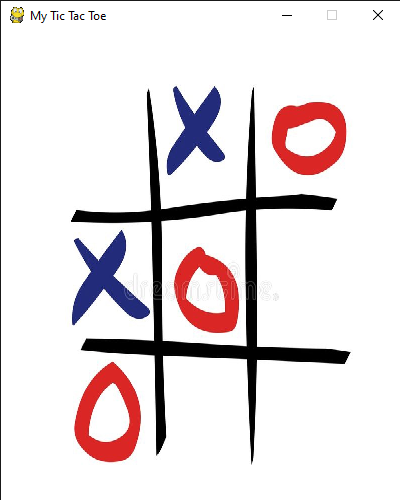

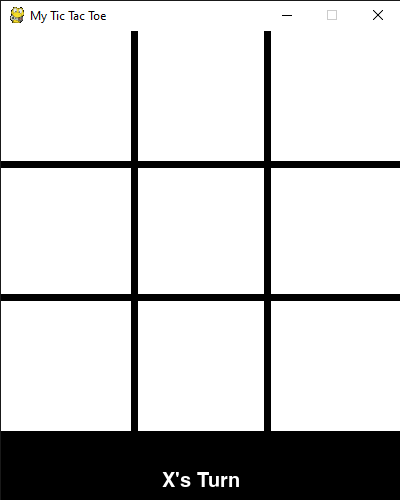

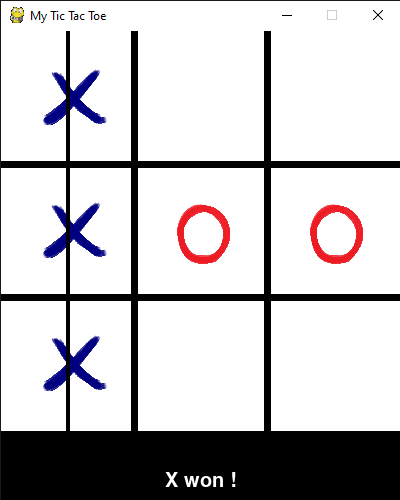